In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

if os.path.exists("MSFT.csv"):
    data = pd.read_csv("MSFT.csv", index_col=0)
else: #download data if not found
    data = yf.Ticker("MSFT")
    data = data.history(period="max")
    data.to_csv("MSFT.csv")



# Convert the index to datetime with utc=True
data.index = pd.to_datetime(data.index, utc=True)

# Ensure the index is a DatetimeIndex
if not isinstance(data.index, pd.DatetimeIndex):
    data = data.set_index(pd.to_datetime(data.index, utc=True))

# Filter data to include only records from 2016 onwards
data = data[data.index.year >= 2010]

# reset the index (the index will be 0,1,2... rather than the date)
# data = data.reset_index()

#volume values are too lage
data['Volume'] = data['Volume']/10000000

data.head(10)

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
<ipython-input-2-7fb8789ae456>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Volume'] = data['Volume']/10000000


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 05:00:00+00:00,23.224620,23.588690,23.201866,23.474918,3.84091,0.0,0.0
2010-01-05 05:00:00+00:00,23.399070,23.588690,23.239789,23.482502,4.97496,0.0,0.0
2010-01-06 05:00:00+00:00,23.421820,23.573516,23.148769,23.338388,5.81824,0.0,0.0
2010-01-07 05:00:00+00:00,23.232203,23.285298,22.898474,23.095678,5.05597,0.0,0.0
2010-01-08 05:00:00+00:00,22.966738,23.421824,22.936398,23.254959,5.11974,0.0,0.0
2010-01-11 05:00:00+00:00,23.292884,23.330809,22.845383,22.959154,6.87547,0.0,0.0
2010-01-12 05:00:00+00:00,22.868137,23.057757,22.686102,22.807459,6.59121,0.0,0.0
2010-01-13 05:00:00+00:00,22.951569,23.148774,22.761950,23.019833,5.18635,0.0,0.0
2010-01-14 05:00:00+00:00,22.989491,23.588690,22.951568,23.482502,6.32281,0.0,0.0


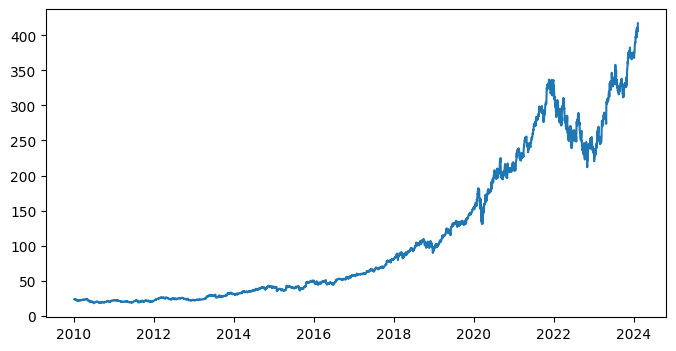

In [3]:
# # Plotting
plt.figure(figsize=(8,4))
plt.plot(data['Close'], label='Closing Price')

In [3]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()
data['Close Tomorrow'] = (data['Close'].shift(-1) > data['Close']).astype(int)* 2 - 1  # * 2 - 1 ==>   replaces 0 with -1

data.head()

<ipython-input-3-410d850acf73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Open - Close'] = data['Open'] - data['Close']
<ipython-input-3-410d850acf73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['High - Low'] = data['High'] - data['Low']


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open - Close,High - Low,Close Tomorrow
Date,,,,,,,,,,
2010-01-04 05:00:00+00:00,23.224620,23.588690,23.201866,23.474918,3.84091,0.0,0.0,-0.250298,0.386824,1
2010-01-05 05:00:00+00:00,23.399070,23.588690,23.239789,23.482502,4.97496,0.0,0.0,-0.083432,0.348901,-1
2010-01-06 05:00:00+00:00,23.421820,23.573516,23.148769,23.338388,5.81824,0.0,0.0,0.083432,0.424748,-1
2010-01-07 05:00:00+00:00,23.232203,23.285298,22.898474,23.095678,5.05597,0.0,0.0,0.136525,0.386824,1
2010-01-08 05:00:00+00:00,22.966738,23.421824,22.936398,23.254959,5.11974,0.0,0.0,-0.288221,0.485426,-1


In [4]:
horizons = [2,5,60,250] #2days , week, ...

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["Close Tomorrow"]


# data = data.dropna(subset=data.columns[data.columns != "Tomorrow"])
data = data.dropna()


data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open - Close,High - Low,Close Tomorrow,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250
Date,,,,,,,,,,,,,,,,,,
2010-12-30 05:00:00+00:00,21.617786,21.679728,21.509388,21.563587,2.07861,0.0,0.0,0.054199,0.170340,1,0.997850,-2.0,0.993224,-3.0,1.057634,8.0,1.041498,6.0
2010-12-31 05:00:00+00:00,21.524872,21.617786,21.393245,21.610043,2.47520,0.0,0.0,-0.085171,0.224541,1,1.001076,0.0,0.998140,-3.0,1.057484,8.0,1.044119,6.0
2011-01-03 05:00:00+00:00,21.718441,21.819098,21.617786,21.664242,5.34438,0.0,0.0,0.054199,0.201312,1,1.001252,2.0,1.001288,-1.0,1.057732,8.0,1.047077,8.0
2011-01-04 05:00:00+00:00,21.633268,21.811351,21.563583,21.749409,5.44056,0.0,0.0,-0.116141,0.247768,-1,1.001962,2.0,1.004649,1.0,1.059440,8.0,1.051467,10.0
2011-01-05 05:00:00+00:00,21.602298,21.687469,21.501643,21.679726,5.89987,0.0,0.0,-0.077428,0.185826,1,0.998395,0.0,1.001216,1.0,1.053688,6.0,1.048417,8.0


In [5]:
X = data[['Volume', 'Open - Close', 'High - Low', 'Close_Ratio_2', 'Close_Ratio_5', 'Close_Ratio_60', "Close_Ratio_250", 'Trend_2', 'Trend_5', 'Trend_60', "Trend_250"]]
X2 = data[['Volume','Close' , 'Open - Close', 'High - Low', 'Close_Ratio_2', 'Close_Ratio_5', 'Close_Ratio_60', "Close_Ratio_250", 'Trend_2', 'Trend_5', 'Trend_60', "Trend_250"]]

#Mohammed says that Ratio_60 is very important
y = data['Close Tomorrow']

X_train = X.iloc[0:-250]
y_train = y.iloc[0:-250]

X_test = X.iloc[-250:]
y_test = y.iloc[-250:]

X2_test = X2.iloc[-250:]

X_train.tail()

,Volume,Open - Close,High - Low,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250,Trend_2,Trend_5,Trend_60,Trend_250
Date,,,,,,,,,,,
2023-02-06 05:00:00+00:00,2.25180,0.664125,3.489052,0.996933,1.002788,1.057004,0.983076,-2.0,1.0,2.0,-16.0
2023-02-07 05:00:00+00:00,5.08414,-6.968213,8.613627,1.020579,1.029053,1.098131,1.024924,0.0,1.0,4.0,-16.0
2023-02-08 05:00:00+00:00,5.46860,6.413137,10.457295,0.998447,1.014947,1.092898,1.022396,0.0,-1.0,2.0,-18.0
2023-02-09 05:00:00+00:00,4.23751,10.090521,11.081762,0.994136,1.003861,1.078887,1.011032,-2.0,-3.0,0.0,-18.0
2023-02-10 05:00:00+00:00,2.58185,-1.556209,3.399847,0.999013,0.998270,1.075129,1.009490,-2.0,-3.0,0.0,-18.0


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV #for selecting best parameter (K) for the model
from sklearn.metrics import accuracy_score, confusion_matrix

#using GridSearch to find the best parameter
params = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)
#cv=5 means that the model evaluation is done using 5-fold cross-validation during the grid search for finding the best parameter (n_neighbors) for the KNeighborsClassifier.

#fit the model
model.fit(X_train, y_train)

#Accuracy Score
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))

print(f'Train_data Accuracy: {accuracy_train:.2f}%')
print(f'Test_data Accuracy: {accuracy_test:.2f}%')

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, model.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, model.predict(X_test))

print("\nConfusion Matrix for Training Data:")
print(conf_matrix_train)

print("\nConfusion Matrix for Test Data:")
print(conf_matrix_test)

# Number of correct predictions for each class
correct_predictions_1_train = conf_matrix_train[1, 1]
correct_predictions_minus1_train = conf_matrix_train[0, 0]

correct_predictions_1_test = conf_matrix_test[1, 1]
correct_predictions_minus1_test = conf_matrix_test[0, 0]

print(f'\nCorrect predictions for class "1" in Training Data: {correct_predictions_1_train}')
print(f'Correct predictions for class "-1" in Training Data: {correct_predictions_minus1_train}')

print(f'\nCorrect predictions for class "1" in Test Data: {correct_predictions_1_test}')
print(f'Correct predictions for class "-1" in Test Data: {correct_predictions_minus1_test}')

Train_data Accuracy: 0.76%
Test_data Accuracy: 0.48%

Confusion Matrix for Training Data:
[[1460    0]
 [ 733  857]]

Confusion Matrix for Test Data:
[[ 88  23]
 [108  31]]

Correct predictions for class "1" in Training Data: 857
Correct predictions for class "-1" in Training Data: 1460

Correct predictions for class "1" in Test Data: 31
Correct predictions for class "-1" in Test Data: 88


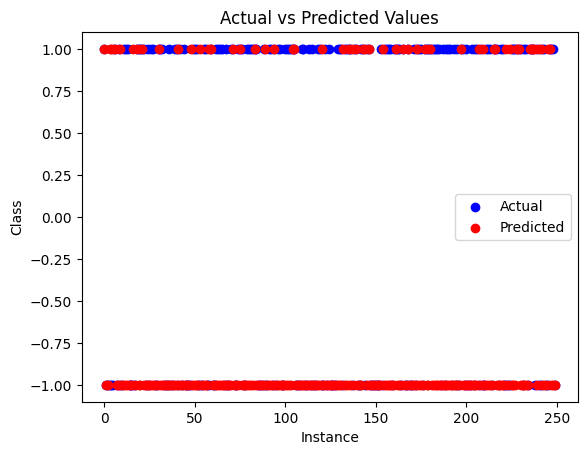

In [15]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), model.predict(X_test), color='red', label='Predicted')

plt.title('Actual vs Predicted Values')
plt.xlabel('Instance')
plt.ylabel('Class')
plt.legend()
plt.show()

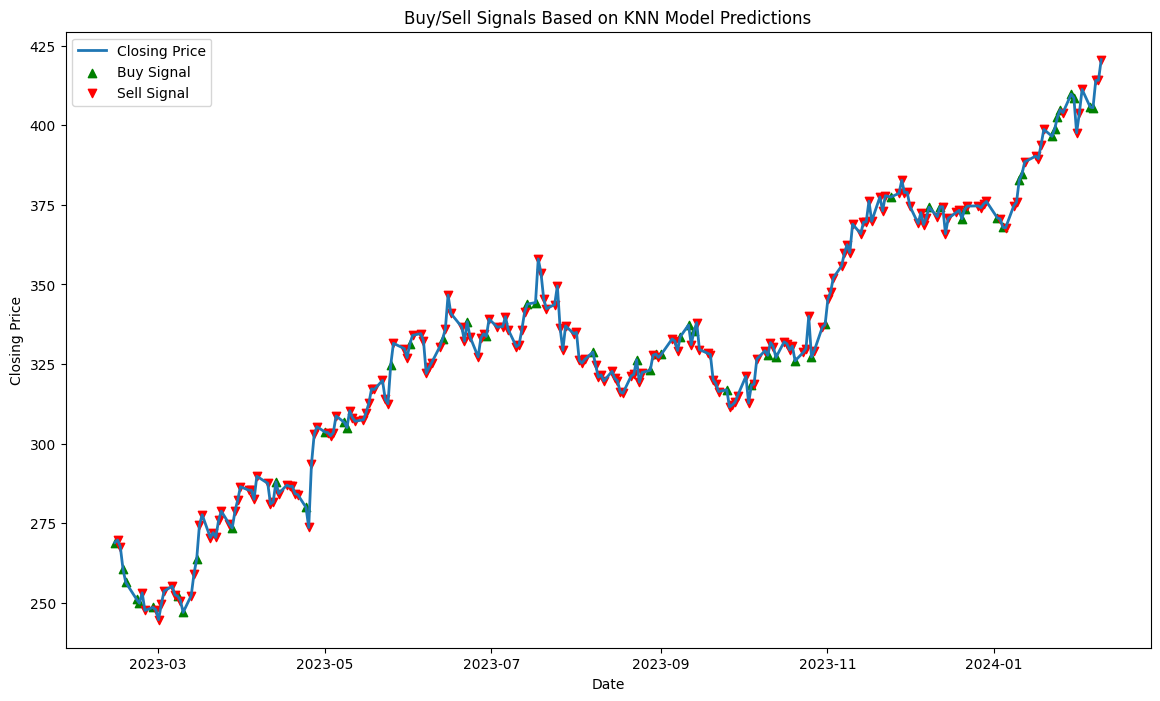

In [16]:
# Predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame for visualization
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)

# Filter rows where the model predicts a buy signal
buy_signals = df_results[df_results['Predicted'] == 1]

# Filter rows where the model predicts a sell signal
sell_signals = df_results[df_results['Predicted'] == -1]

# Plotting the closing prices
plt.figure(figsize=(14, 8))
plt.plot(data.index[-250:], data['Close'][-250:], label='Closing Price', linewidth=2)

# Plotting buy signals
plt.scatter(buy_signals.index, data['Close'].loc[buy_signals.index], marker='^', color='g', label='Buy Signal')

# Plotting sell signals
plt.scatter(sell_signals.index, data['Close'].loc[sell_signals.index], marker='v', color='r', label='Sell Signal')

plt.title('Buy/Sell Signals Based on KNN Model Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


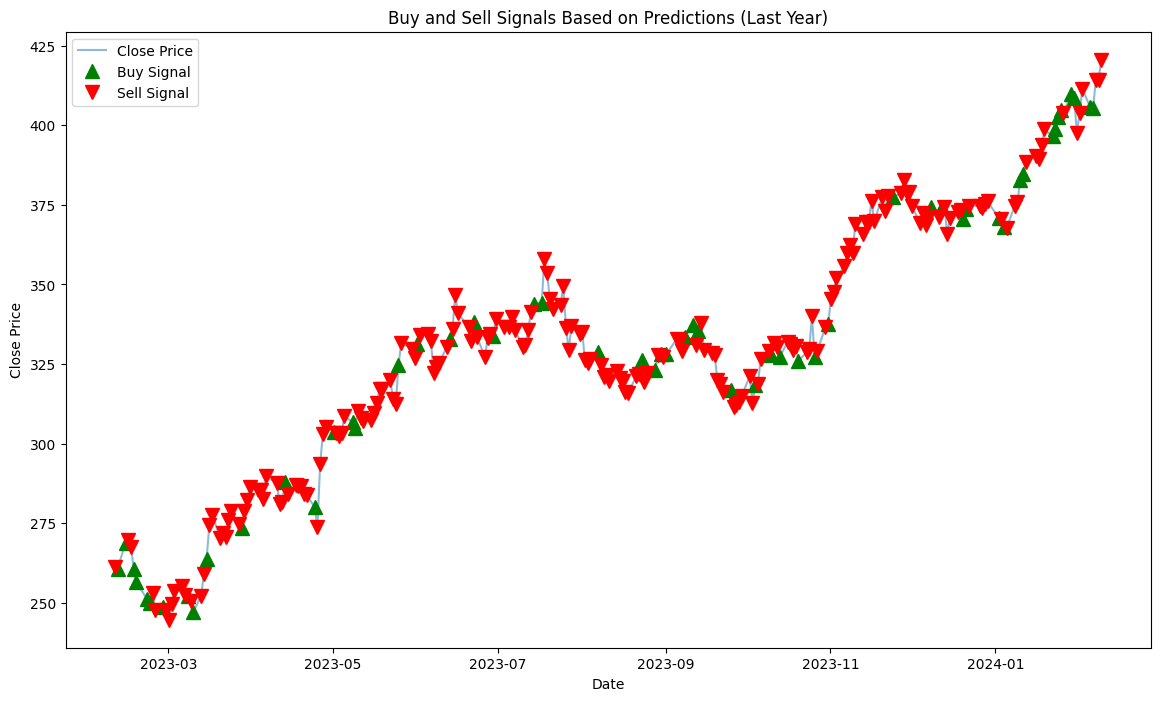

In [17]:
# Assuming 'model' is your trained KNN model
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Concatenate the training and testing predictions for the entire dataset
all_predictions = np.concatenate([predictions_train, predictions_test])

# Create a new DataFrame with the predicted signals
signals_df = pd.DataFrame(index=data.index)
signals_df['Buy_Sell_Signal'] = all_predictions

# Filter signals for the last year
last_year_signals = signals_df[signals_df.index >= signals_df.index[-1] - pd.DateOffset(years=1)]

# Filter stock data for the last year
last_year_data = data[data.index >= data.index[-1] - pd.DateOffset(years=1)]

# Plot the Buy (1) and Sell (-1) signals for the last year
plt.figure(figsize=(14, 8))
plt.plot(last_year_data.index, last_year_data['Close'], label='Close Price', alpha=0.5)

# Plot Buy signals
plt.plot(last_year_signals[last_year_signals['Buy_Sell_Signal'] == 1].index,
         last_year_data['Close'][last_year_signals['Buy_Sell_Signal'] == 1],
         '^', markersize=10, color='g', label='Buy Signal')

# Plot Sell signals
plt.plot(last_year_signals[last_year_signals['Buy_Sell_Signal'] == -1].index,
         last_year_data['Close'][last_year_signals['Buy_Sell_Signal'] == -1],
         'v', markersize=10, color='r', label='Sell Signal')

plt.title('Buy and Sell Signals Based on Predictions (Last Year)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


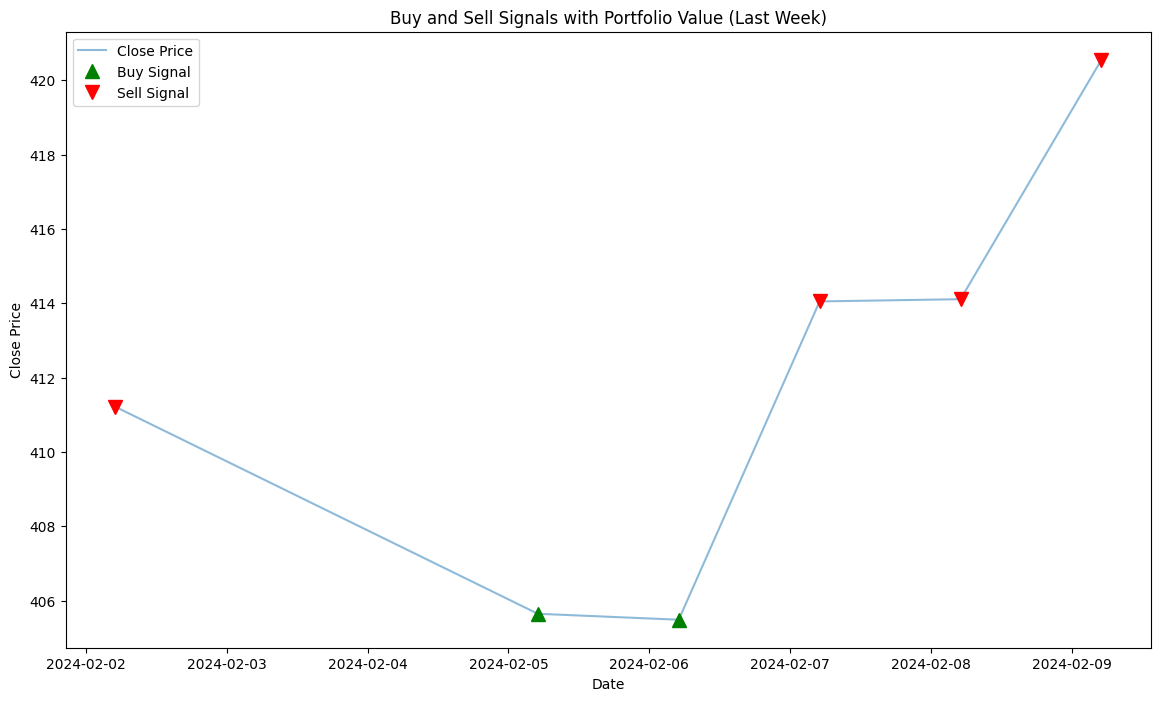

Initial Investment: $411.22
Total Profit after one week of trading: $8.40
Total Portfolio Value: $419.62


In [18]:
# Assuming 'model' is your trained KNN model
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Concatenate the training and testing predictions for the entire dataset
all_predictions = np.concatenate([predictions_train, predictions_test])

# Create a new DataFrame with the predicted signals
signals_df = pd.DataFrame(index=data.index)
signals_df['Buy_Sell_Signal'] = all_predictions

# Filter signals for the last week
last_week_signals = signals_df[signals_df.index >= signals_df.index[-1] - pd.DateOffset(weeks=1)]

# Filter stock data for the last week
last_week_data = data[data.index >= data.index[-1] - pd.DateOffset(weeks=1)]

# Calculate profit and portfolio value based on buy and sell signals
profit = 0
portfolio_value = 0
position = 0  # 0: no position, 1: long position, -1: short position
buy_price = 0

for index, row in last_week_signals.iterrows():
    if row['Buy_Sell_Signal'] == 1 and position == 0:  # Buy signal and no current position
        buy_price = last_week_data.loc[index, 'Close']
        position = 1  # Set to long position
    elif row['Buy_Sell_Signal'] == -1 and position == 1:  # Sell signal and long position
        profit += last_week_data.loc[index, 'Close'] - buy_price
        position = 0  # Set to no position

# Calculate the initial investment (assuming one stock bought on the first buy signal)
initial_investment = last_week_data.iloc[0]['Close']

# Calculate the total portfolio value
portfolio_value = initial_investment + profit

# Plot the Buy (1) and Sell (-1) signals for the last week
plt.figure(figsize=(14, 8))
plt.plot(last_week_data.index, last_week_data['Close'], label='Close Price', alpha=0.5)

# Plot Buy signals
plt.plot(last_week_signals[last_week_signals['Buy_Sell_Signal'] == 1].index,
         last_week_data['Close'][last_week_signals['Buy_Sell_Signal'] == 1],
         '^', markersize=10, color='g', label='Buy Signal')

# Plot Sell signals
plt.plot(last_week_signals[last_week_signals['Buy_Sell_Signal'] == -1].index,
         last_week_data['Close'][last_week_signals['Buy_Sell_Signal'] == -1],
         'v', markersize=10, color='r', label='Sell Signal')

plt.title('Buy and Sell Signals with Portfolio Value (Last Week)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Print the total profit and portfolio value
print(f'Initial Investment: ${initial_investment:.2f}')
print(f'Total Profit after one week of trading: ${profit:.2f}')
print(f'Total Portfolio Value: ${portfolio_value:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 

Initial Portfolio Value: 100000
Final Portfolio Value: 118761.4098052978
Gain or Loss: 18761.409805297793


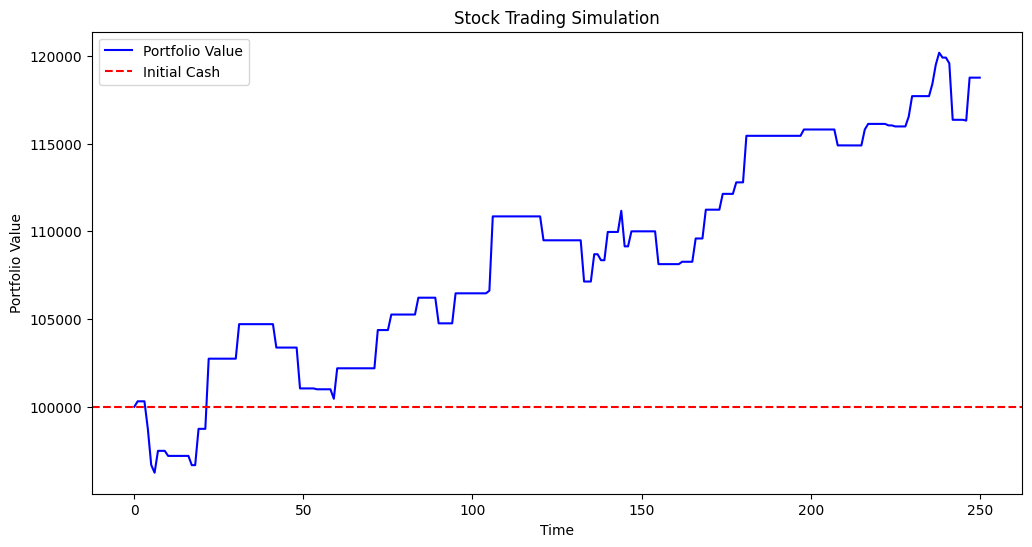

In [19]:
import matplotlib.pyplot as plt

initial_cash = 100000  # Set your initial cash amount
cash = initial_cash
stocks_held = 0   # Number of stocks
portfolio_value = []

for index, row in X2_test.iterrows():
    newRow = row.drop('Close').copy()
    prediction = model.predict([newRow])[0]

    if prediction == 1:  # Buy signal
        while cash > row['Close']:
            stocks_held += 1
            cash -= row['Close']
    elif prediction == -1:  # Sell signal
        while stocks_held > 0:
            cash += row['Close']
            stocks_held -= 1

    portfolio_value.append(cash + stocks_held * row['Close'])

# Include the last portfolio value after the last data point
portfolio_value.append(cash + stocks_held * X2_test.iloc[-1]['Close'])

final_portfolio_value = portfolio_value[-1]  # Use the last value in the list
gain_or_loss = final_portfolio_value - initial_cash

print(f"Initial Portfolio Value: {initial_cash}")
print(f"Final Portfolio Value: {final_portfolio_value}")
print(f"Gain or Loss: {gain_or_loss}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value, label='Portfolio Value', color='blue')
plt.axhline(y=initial_cash, color='r', linestyle='--', label='Initial Cash')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Stock Trading Simulation')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 

Initial Portfolio Value: 100000
Final Portfolio Value: 118761.4098052978
Gain or Loss: 18761.409805297793


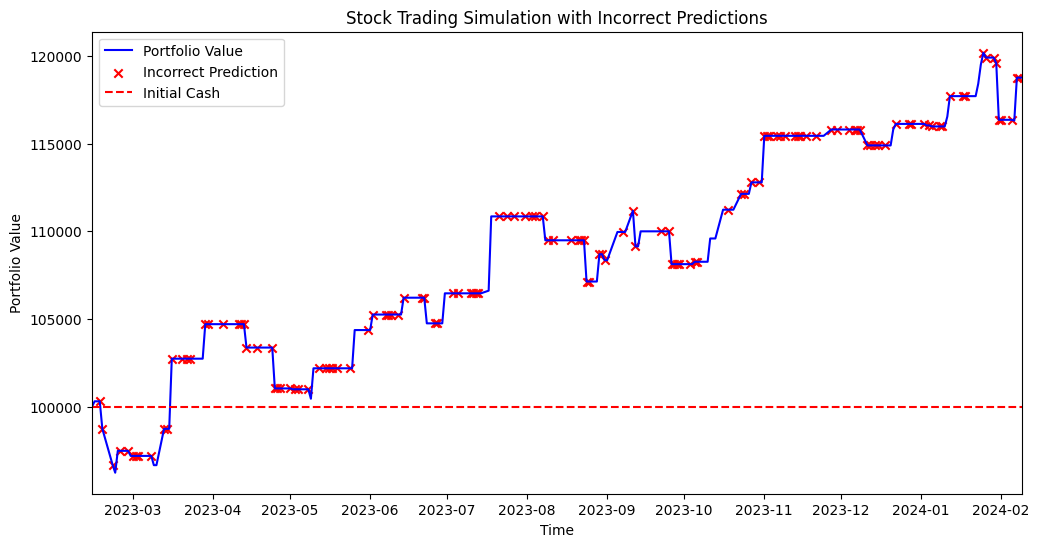

In [20]:
import matplotlib.pyplot as plt

initial_cash = 100000  # Set your initial cash amount
cash = initial_cash
stocks_held = 0   # Number of stocks
portfolio_value = []
incorrect_predictions = []

for index, row in X2_test.iterrows():
    newRow = row.drop('Close').copy()
    prediction = model.predict([newRow])[0]

    if prediction == 1:  # Buy signal
        while cash > row['Close']:
            stocks_held += 1
            cash -= row['Close']
    elif prediction == -1:  # Sell signal
        while stocks_held > 0:
            cash += row['Close']
            stocks_held -= 1

    portfolio_value.append(cash + stocks_held * row['Close'])

    # Check if the prediction was incorrect
    actual_movement = int(y_test.loc[index])
    if prediction != actual_movement:
        incorrect_predictions.append((index, portfolio_value[-1]))

# Include the last portfolio value after the last data point
portfolio_value.append(cash + stocks_held * X2_test.iloc[-1]['Close'])

final_portfolio_value = portfolio_value[-1]  # Use the last value in the list
gain_or_loss = final_portfolio_value - initial_cash

print(f"Initial Portfolio Value: {initial_cash}")
print(f"Final Portfolio Value: {final_portfolio_value}")
print(f"Gain or Loss: {gain_or_loss}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(X2_test.index, portfolio_value[:-1], label='Portfolio Value', color='blue')  # Exclude the last value for better visualization
incorrect_indices, incorrect_values = zip(*incorrect_predictions)
plt.scatter(incorrect_indices, incorrect_values, color='red', marker='x', label='Incorrect Prediction')

plt.axhline(y=initial_cash, color='r', linestyle='--', label='Initial Cash')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Stock Trading Simulation with Incorrect Predictions')
plt.legend()
plt.xlim(X2_test.index[0], X2_test.index[-1])  # Set the x-axis limits to the desired date range
plt.show()

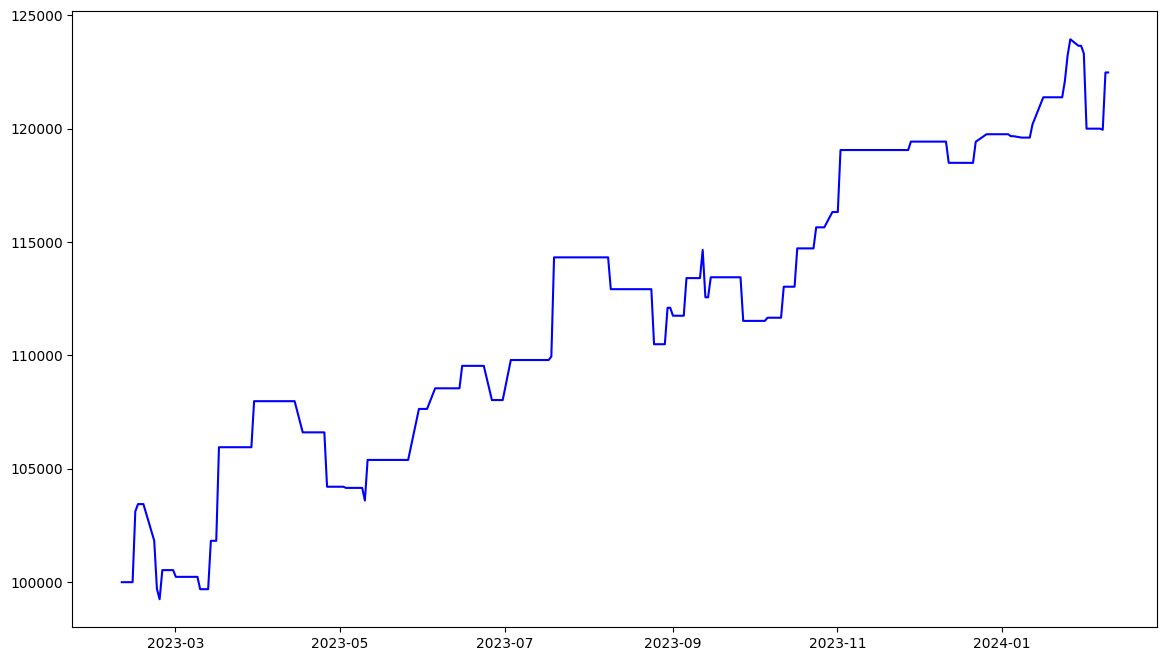

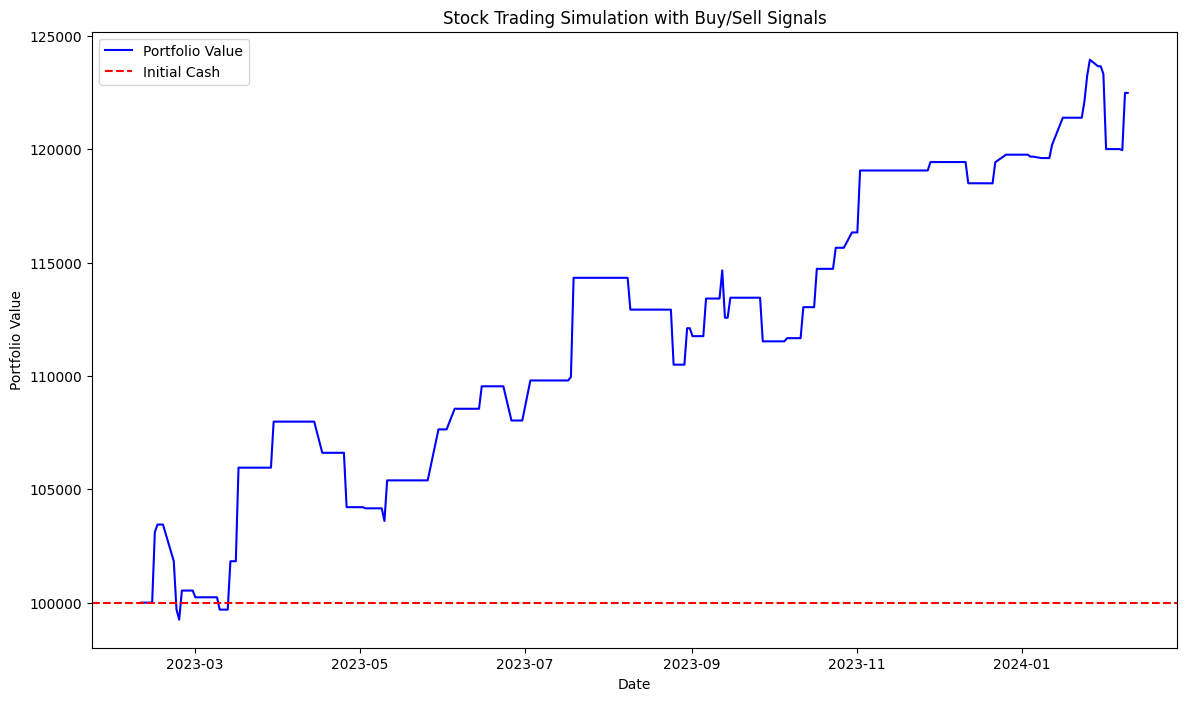

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'model' is your trained KNN model
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Concatenate the training and testing predictions for the entire dataset
all_predictions = np.concatenate([predictions_train, predictions_test])

# Create a new DataFrame with the predicted signals
signals_df = pd.DataFrame(index=data.index)
signals_df['Buy_Sell_Signal'] = all_predictions

# Filter signals for the last year
last_year_signals = signals_df[signals_df.index >= signals_df.index[-1] - pd.DateOffset(years=1)]

# Filter stock data for the last year
last_year_data = data[data.index >= data.index[-1] - pd.DateOffset(years=1)]

# Initialize portfolio variables
initial_cash = 100000  # Set your initial cash amount
cash = initial_cash
stocks_held = 0   # Number of stocks
portfolio_value = [initial_cash]  # Include the initial cash in the portfolio value
transaction_history = []  # To store buy/sell transactions

# Trading simulation loop
for index, row in last_year_data.iterrows():
    prediction = signals_df.loc[index, 'Buy_Sell_Signal']

    if prediction == 1 and cash > row['Close']:  # Buy signal
        stocks_bought = cash // row['Close']  # Buy as many stocks as possible with available cash
        stocks_held += stocks_bought
        cash -= stocks_bought * row['Close']
        transaction_history.append((index, 'Buy', row['Close'], stocks_bought))
    elif prediction == -1 and stocks_held > 0:  # Sell signal
        cash += stocks_held * row['Close']
        transaction_history.append((index, 'Sell', row['Close'], stocks_held))
        stocks_held = 0

    # Update portfolio value after each transaction
    portfolio_value.append(cash + stocks_held * row['Close'])

# Plotting the portfolio value over time
plt.figure(figsize=(14, 8))
plt.plot(last_year_data.index, portfolio_value[:-1], label='Portfolio Value', color='blue')
# Plotting the portfolio value over time
plt.figure(figsize=(14, 8))
plt.plot(last_year_data.index, portfolio_value[:-1], label='Portfolio Value', color='blue')

# Extract buy and sell signals for plotting
buy_signals = [(index, value) for index, _, _, value in transaction_history if _ == 'Buy']
sell_signals = [(index, value) for index, _, _, value in transaction_history if _ == 'Sell']

# Plot Buy signals
if buy_signals:
    buy_indices, buy_values = zip(*buy_signals)
    plt.scatter(buy_indices, buy_values, color='green', marker='^', label='Buy Signal')

# Plot Sell signals
if sell_signals:
    sell_indices, sell_values = zip(*sell_signals)
    plt.scatter(sell_indices, sell_values, color='red', marker='v', label='Sell Signal')

plt.axhline(y=initial_cash, color='r', linestyle='--', label='Initial Cash')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Stock Trading Simulation with Buy/Sell Signals')
plt.legend()
plt.show()